In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
df=pd.read_csv('generated_data.csv')
print(df.head())
print(df.columns)

   Headach  fever  vomit_and_nuasea  cough_chest_pain  chills  \
0        0      1                 0                 1       1   
1        1      1                 0                 1       1   
2        1      1                 0                 1       1   
3        0      0                 1                 1       1   
4        1      1                 1                 1       1   

   bone_joint_pain  rash  muscles_aches  swollen_abdomen classification  \
0                0     0              0                0        malaria   
1                0     0              0                0        malaria   
2                0     0              0                0        malaria   
3                0     0              0                0        malaria   
4                0     0              0                0        malaria   

   Unnamed: 10  Unnamed: 11  Unnamed: 12      
0          NaN          NaN          NaN NaN  
1          NaN          NaN          NaN NaN  
2          NaN   

In [104]:
df=df[['Headach', 'fever', 'vomit_and_nuasea', 'cough_chest_pain', 'chills',
       'bone_joint_pain', 'rash', 'muscles_aches', 'swollen_abdomen',
       'classification']]
print(df.head())

   Headach  fever  vomit_and_nuasea  cough_chest_pain  chills  \
0        0      1                 0                 1       1   
1        1      1                 0                 1       1   
2        1      1                 0                 1       1   
3        0      0                 1                 1       1   
4        1      1                 1                 1       1   

   bone_joint_pain  rash  muscles_aches  swollen_abdomen classification  
0                0     0              0                0        malaria  
1                0     0              0                0        malaria  
2                0     0              0                0        malaria  
3                0     0              0                0        malaria  
4                0     0              0                0        malaria  


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 10 columns):
Headach             212 non-null int64
fever               212 non-null int64
vomit_and_nuasea    212 non-null int64
cough_chest_pain    212 non-null int64
chills              212 non-null int64
bone_joint_pain     212 non-null int64
rash                212 non-null int64
muscles_aches       212 non-null int64
swollen_abdomen     212 non-null int64
classification      212 non-null object
dtypes: int64(9), object(1)
memory usage: 16.6+ KB


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [107]:
X=df[['Headach', 'fever', 'vomit_and_nuasea', 'cough_chest_pain', 'chills',
       'bone_joint_pain', 'rash', 'muscles_aches', 'swollen_abdomen']]
y=df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [108]:
lm=LogisticRegression(solver='lbfgs')
model=lm.fit(X_train,y_train)

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [109]:
predict=lm.predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

results = confusion_matrix(y_test, predict)
accuracy=accuracy_score(y_test, predict)
report=classification_report(y_test, predict) 
print(results)
print(accuracy)
print('\n')
print(report)

[[20  0  0  0]
 [ 0 13  0  0]
 [ 0  5  9  2]
 [ 0  0  0 15]]
0.890625


              precision    recall  f1-score   support

      dangue       1.00      1.00      1.00        20
     malaria       0.72      1.00      0.84        13
        none       1.00      0.56      0.72        16
     typhoid       0.88      1.00      0.94        15

   micro avg       0.89      0.89      0.89        64
   macro avg       0.90      0.89      0.87        64
weighted avg       0.92      0.89      0.88        64



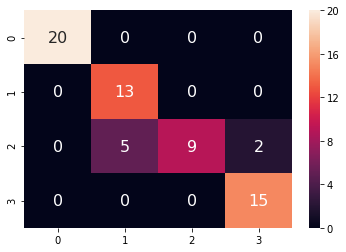

In [111]:
import seaborn as sn

sn.heatmap(results, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [112]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm,X,y, cv=5)
print(scores)
print(scores.mean())

[0.93023256 0.93023256 0.95348837 0.9047619  0.95121951]
0.9339869810658239


C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users

In [113]:
print(lm.predict([[1,1,1,0,0,1,1,0,0]]))

['dangue']


In [114]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
pred_DT = clf.predict(X_test)

In [115]:
results3 = confusion_matrix(y_test, pred_DT)
accuracy3=accuracy_score(y_test, pred_DT)
report3=classification_report(y_test, pred_DT) 
print(results3)
print('Decision Tree Accuracy: ',accuracy3)
print('\n')
print(report3)

[[20  0  0  0]
 [ 0 13  0  0]
 [ 0  0 16  0]
 [ 0  0  0 15]]
Decision Tree Accuracy:  1.0


              precision    recall  f1-score   support

      dangue       1.00      1.00      1.00        20
     malaria       1.00      1.00      1.00        13
        none       1.00      1.00      1.00        16
     typhoid       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [116]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=3)
clf = clf.fit(X, y)
print(clf.predict([[1,1,0,0,0,0,0,0,0]]))

['dangue']


In [117]:
pred_RandomFor=clf.predict(X_test)

In [118]:

results2 = confusion_matrix(y_test, pred_RandomFor)
accuracy2=accuracy_score(y_test, pred_RandomFor)
report2=classification_report(y_test, pred_RandomFor) 
print(results2)
print('Random Forest Accuracy: ',accuracy2)
print('\n')
print(report2)

[[20  0  0  0]
 [ 0 13  0  0]
 [ 0  0 16  0]
 [ 0  0  0 15]]
Random Forest Accuracy:  1.0


              precision    recall  f1-score   support

      dangue       1.00      1.00      1.00        20
     malaria       1.00      1.00      1.00        13
        none       1.00      1.00      1.00        16
     typhoid       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



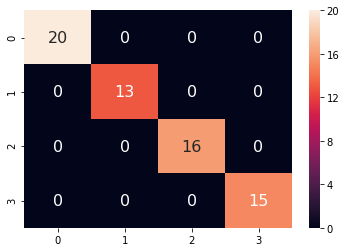

In [119]:
sn.heatmap(results2, annot=True, annot_kws={"size": 16}) # font size

plt.show()